In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("students_adaptability_level_online_education.csv")

In [3]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
#Making name changes in the data 
data.rename(columns = {'Adaptivity Level':'Adaptivity'},inplace = True)
data.rename(columns = {'Age': 'Age Range'},inplace = True)

data.replace("Boy","Male",inplace=True)
data.replace("Girl","Female",inplace=True)
data.replace("Mid","Middle Class",inplace=True)
data.replace("Poor","Lower Class",inplace=True)
data.replace("Rich","Upper Class",inplace=True)

In [6]:
data.isnull().sum()

Gender                 0
Age Range              0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity             0
dtype: int64

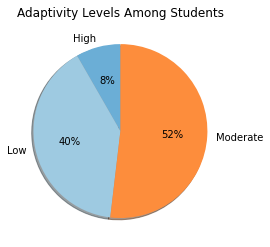

In [7]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

Adapt= data.groupby([  
        'Adaptivity'])['Adaptivity'].count().to_frame()

plt.pie(Adapt.Adaptivity,colors= inner_colors,
        labels = Adapt.index,startangle = 90, autopct = "%1.0f%%", 
        explode = None, shadow = True)
plt.title("Adaptivity Levels Among Students")
plt.show()

In [10]:
# As id be grouping a lot of categories to test relationship
# A function will be recreated for ease
# the function returns each category grouped by tables

def create_groups(
    df: pd.DataFrame, var1: str, 
    var2: str)->pd.DataFrame:
    
    category = df.groupby([var1,var2])[var2].count().to_frame()
    
    print('Adaptivity' + ' by ' + var1)
    
    return category

create_groups(data, 'Education Level', 'Adaptivity')

Adaptivity by Education Level


Adaptivity
Education Level Adaptivity            
College         High                 3
                Low                120
                Moderate            96
School          High                47
                Low                182
                Moderate           301
University      High                50
                Low                178
                Moderate           228

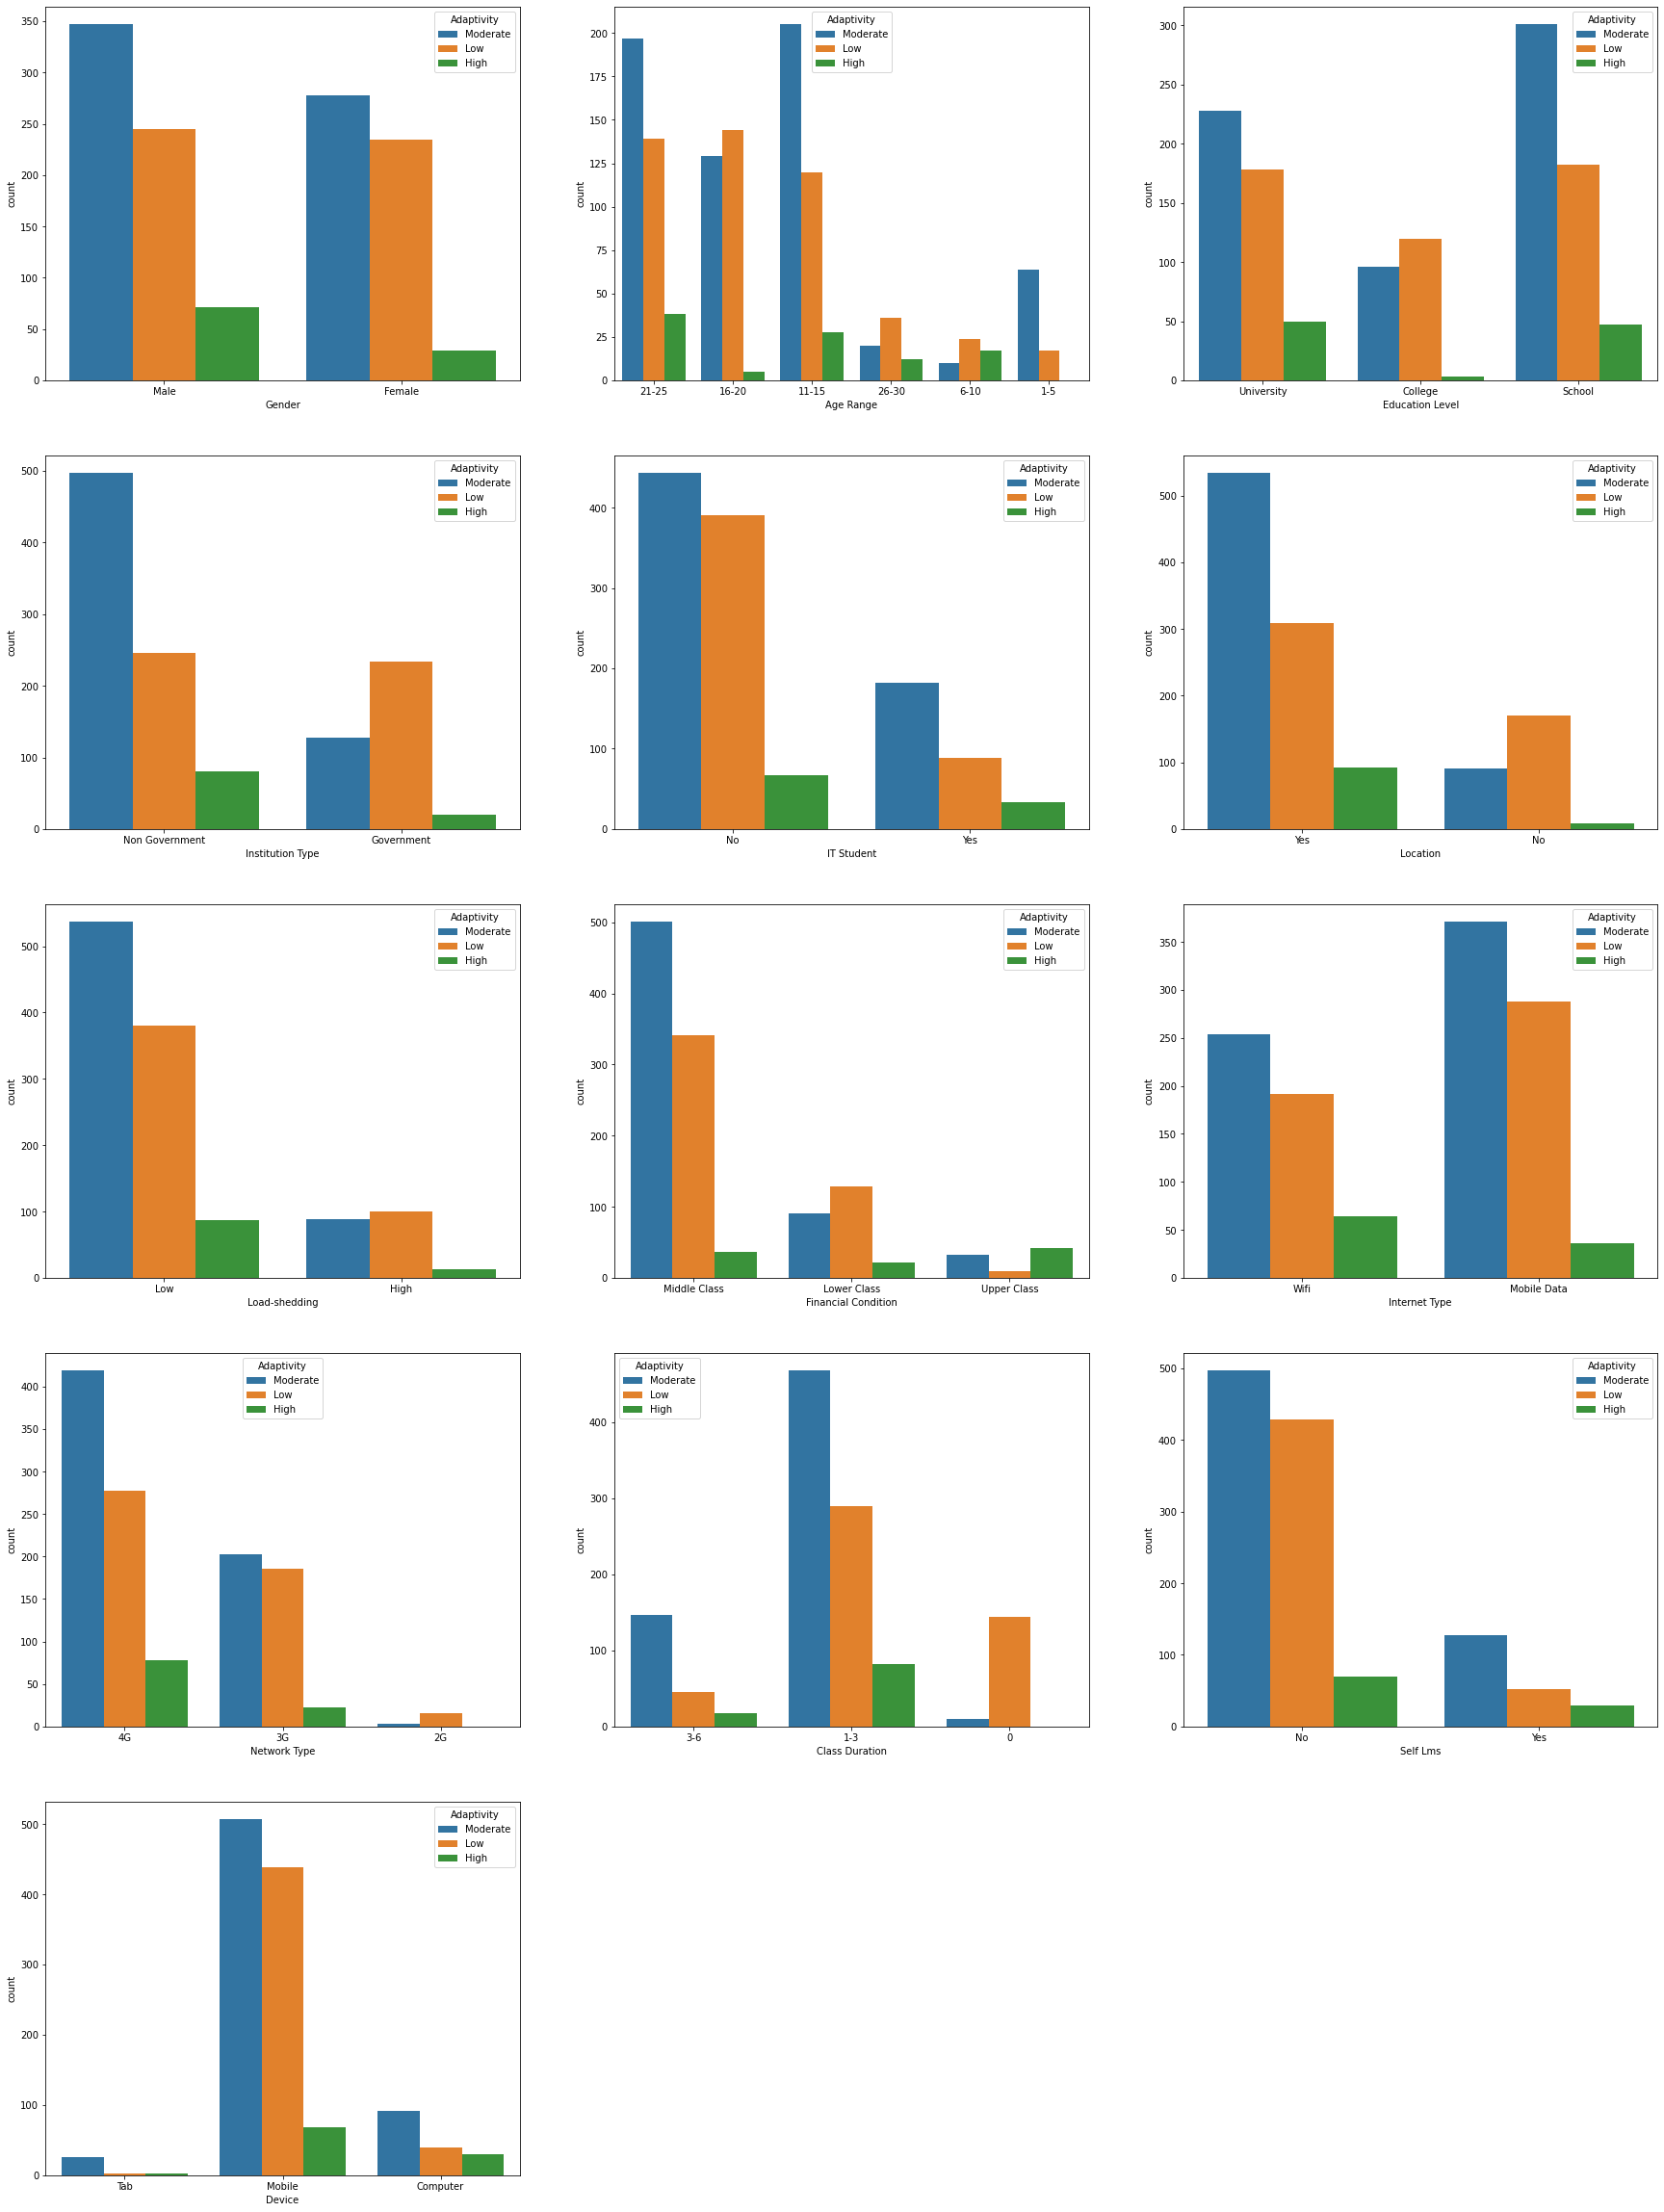

In [11]:
#to create barplot visualizations for the different categories 
i = 1
plt.figure(figsize = (30,50))
for feature in [col for col in data.columns if col!='Adaptivity' ]:
    plt.subplot(6,3,i),  
    sns.countplot(x = feature , hue='Adaptivity', data = data,)
 
    i +=1

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# since the age comes as a range and is a string, python will automatically sort by alphabetical order
# to be able to sort numerically,id split the range and use the lower limit instead 
col1 = data["Age Range"].apply(lambda x: x.split("-")[0])
data1 = data.join(col1.to_frame(name="Lower limit Age"))
data1.drop(['Age Range'], axis = 1, inplace = True)
data1

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity,Lower limit Age
0,Male,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate,21
1,Female,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate,21
2,Female,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate,16
3,Female,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate,11
4,Female,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16
1201,Female,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate,16
1202,Male,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate,11
1203,Female,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16


In [14]:
# will change to integer too 
data1['Lower limit Age'] = data1['Lower limit Age'].astype(int)

In [15]:
scaler = OrdinalEncoder()
names = data.columns
d = scaler.fit_transform(data1)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,Gender,Age Range,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity
0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,4.0
1,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,4.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
train = scaled_df.drop(['Adaptivity','Gender',],axis = 1)
test = scaled_df['Adaptivity']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(train,test ,test_size=0.33,random_state=42)

In [19]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]


for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)

    print(f'model: {str(a)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.76      0.59      0.67        27
         1.0       0.92      0.57      0.71        21
         2.0       0.85      0.90      0.88       123
         3.0       0.88      0.94      0.91        78
         4.0       0.95      0.95      0.95       129
         5.0       0.74      0.85      0.79        20

    accuracy                           0.88       398
   macro avg       0.85      0.80      0.82       398
weighted avg       0.88      0.88      0.88       398

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47        27
         1.0       0.81      0.62      0.70        21
         2.0       0.79      0.85      0.82       123
         3.0       0.87      0.79      0.83        78
         4.0       0.90      0.95      0.92       129
         5.0       0.68      0.65    

In [20]:
FinalM= RandomForestClassifier()
FinalM.fit(X_train, y_train)
y_pred = FinalM.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.76      0.59      0.67        27
         1.0       0.92      0.57      0.71        21
         2.0       0.85      0.90      0.88       123
         3.0       0.88      0.95      0.91        78
         4.0       0.97      0.94      0.95       129
         5.0       0.72      0.90      0.80        20

    accuracy                           0.88       398
   macro avg       0.85      0.81      0.82       398
weighted avg       0.89      0.88      0.88       398



Text(0.5, 1.0, '5 most important features')

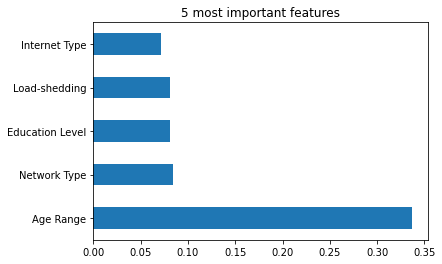

In [24]:
feature_importances=FinalM.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Variable importance':feature_importances})

feature_importances_df.sort_values('Variable importance',ascending=False)

feat_importances = pd.Series(FinalM.feature_importances_, index=train.columns)

feat_importances.nlargest(5).plot(kind='barh')
plt.title("5 most important features")